In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import os
import time
import sklearn
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import sklearn
from tabulate import tabulate
from sklearn.svm import SVC
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

evaluate={'Acc':"Accuracy", 'b_Acc':"Balanced Accuracy", 'F1':"F1 Score", 'kap':"Kappa", 'ROC':"Roc"}

In [6]:
import time
# sleep for 3 seconds
print('Sleep time: ', str(3600), 'seconds')
#time.sleep(3600)
print('Woke up after: ', str(3), 'seconds')



Sleep time:  3600 seconds
Woke up after:  3 seconds


In [7]:
#Mục đích: Thực hiện lựa chọn đặc trưng bằng thuật toán di truyền (GA). Hàm này bao gồm các bước khởi tạo quần thể, tính toán điểm fitness, chọn lọc, lai ghép, đột biến, và tiến hóa qua các thế hệ.
# sửa bool  chromosome = np.ones(n_feat,dtype=bool)
# sửa thuật toán muốn làm 
# sửa đầu ra list np.save(outputcsv.replace("csv","npy"), np_data)
def GA(train,test,cols,gen_number=25,outputcsv="GA_output.csv"):
    #defining various steps required for the genetic algorithm
    # GA adapted from https://datascienceplus.com/genetic-algorithm-in-machine-learning-using-python/
    def initilization_of_population(size,n_feat):
        population = []
        for i in range(size):
            chromosome = np.ones(n_feat,dtype=bool)
            chromosome[:int(0.3*n_feat)]=False
            np.random.shuffle(chromosome)
            population.append(chromosome)
        return population

    def fitness_score(population):
        scores = []
        for chromosome in population:
            logmodel.fit(X_train.iloc[:,chromosome],y_train)
            predictions = logmodel.predict(X_test.iloc[:,chromosome])
            scores.append(sklearn.metrics.f1_score(y_test,predictions,average= "macro"))
        scores, population = np.array(scores), np.array(population) 
        inds = np.argsort(scores)
        return list(scores[inds][::-1]), list(population[inds,:][::-1])

    def selection(pop_after_fit,n_parents):
        population_nextgen = []
        for i in range(n_parents):
            population_nextgen.append(pop_after_fit[i])
        return population_nextgen

    def crossover(pop_after_sel):
        population_nextgen=pop_after_sel
        for i in range(len(pop_after_sel)):
            child=pop_after_sel[i]
            child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
            population_nextgen.append(child)
        return population_nextgen

    def mutation(pop_after_cross,mutation_rate):
        population_nextgen = []
        for i in range(0,len(pop_after_cross)):
            chromosome = pop_after_cross[i]
            for j in range(len(chromosome)):
                if random.random() < mutation_rate:
                    chromosome[j]= not chromosome[j]
            population_nextgen.append(chromosome)
        #print(population_nextgen)
        return population_nextgen

    def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                       X_test, y_train, y_test):

        best_chromo= []
        best_score= []
        population_nextgen=initilization_of_population(size,n_feat)
        for i in tqdm(range(n_gen)):
            second=time.time()
            scores, pop_after_fit = fitness_score(population_nextgen)
            #print(scores[:2])
            zaman=time.time()-second

            ths.write(f"{np.mean(scores)},{np.mean(scores)},{zaman}\n")
            


            pop_after_sel = selection(pop_after_fit,n_parents)
            pop_after_cross = crossover(pop_after_sel)
            population_nextgen = mutation(pop_after_cross,mutation_rate)
            best_chromo.append(pop_after_fit[0])
            best_score.append(scores[0])
        return best_chromo,best_score
    

    df = pd.read_csv(train,usecols=cols)#,header=None )
    df=df.fillna(0)
    #df = df.sample(n = 10000)
    X_train =df[df.columns[0:-1]]
    #X_train=np.array(X_train)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y_train=df[df.columns[-1]].cat.codes  
    df = pd.read_csv(test,usecols=cols)#,header=None )
    df=df.fillna(0)
    #df = df.sample(n = 10000)
    X_test =df[df.columns[0:-1]]
    #X_test=np.array(X_test)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y_test=df[df.columns[-1]].cat.codes  

    
    ths = open(f"./{outputcsv}", "w")
    ths.write("MEAN,STD,TIME\n")
    logmodel=SVC()
    #print ('%-30s %-30s %-30s' % ("MEAN","STD","TIME"))
    chromo,score=generations(size=200,n_feat=X_train.shape[1],n_parents=120,mutation_rate=0.005,
                         n_gen=gen_number,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
    #logmodel.fit(X_train.iloc[:,chromo[-1]],y_train)
    #predictions = logmodel.predict(X_test.iloc[:,chromo[-1]])
    #print("F1 Score score after genetic algorithm is= "+str(sklearn.metrics.f1_score(y_test,predictions,average= "macro")))
    ths.close()
    sonuç=[]
    for k,j in enumerate(chromo):
        temp=X_train.iloc[:,j]
        temp=list(temp.columns)
        temp.append("Label")
        sonuç.append(temp)
    
    np.save(outputcsv.replace("csv","npy"), sonuç)
    gf = pd.read_csv(outputcsv)
    gf=gf["MEAN"].values
    gf=np.argmax(gf) 
    return sonuç[gf],gf

In [8]:
def folder(f_name): #this function creates a folder named "attacks" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")

In [9]:
def find_the_way(path,file_format,con=""):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                if con in file:
                    files_add.append(os.path.join(r, file))  
            
    return files_add

In [23]:
ml_list={
"RF":RandomForestClassifier(),
#bootstrap=False,criterion="gini",max_depth=32,max_features=9,min_samples_split=3,n_estimators=148
}


In [11]:
def target_name(name):
    df = pd.read_csv(name,usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    return target_names

In [12]:
folder("results")
folder("results/beforeGA/")
folder("results/afterGA/")
folder("pdfs")

## Calculation of evaluations

In [13]:
def score(train_time,test_time,predict,y_test,class_based_results,repeat,cv,dname,ml,sw):
    train_time=train_time[0]
    test_time=test_time[0]
    rc=sklearn.metrics.recall_score(y_test, predict,average= "macro")
    pr=sklearn.metrics.precision_score(y_test, predict,average= "macro")
    f_1=sklearn.metrics.f1_score(y_test, predict,average= "macro")     
    accuracy=sklearn.metrics.accuracy_score(y_test, predict)
    accuracy_b=sklearn.metrics.balanced_accuracy_score( y_test,predict)
    kappa=sklearn.metrics.cohen_kappa_score(y_test, predict,labels=None, weights=None, sample_weight=None)
    try:
        roc=sklearn.metrics.roc_auc_score(y_test, predict)
    except:roc=0
    report = sklearn.metrics.classification_report(y_test, predict, target_names=target_names,output_dict=True)
    cr = pd.DataFrame(report).transpose()
    line=[dname,sw,repeat,cv,ml,accuracy,accuracy_b,pr,rc,f_1,kappa,roc,train_time,test_time]

    if class_based_results.empty:
        class_based_results =cr
    else:
        class_based_results = class_based_results.add(cr, fill_value=0)
    return class_based_results,line

In [14]:
#Thực hiện huấn luyện và đánh giá mô hình học máy với các tập dữ liệu và đặc trưng cụ thể bằng cách sử dụng phương pháp cross-validation.
def ML_CV(loop1,loop2,output_csv,cols,dname,sw):
    fold=5
    repetition=10

    for ii in ml_list:
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        cv=0
        lines=[["Dataset","SW","T","CV","ML","Acc","b_Acc","Prec","Rec","F1","kap","ROC","tra-T","test-T"]]
        for i in range(repetition):

            #rnd = random()
            
            #kfold = sklearn.model_selection.KFold(n_splits=fold, shuffle=True, random_state=int(rnd*100))  
            cv=0
            df = pd.read_csv(loop1,usecols=cols)#,header=None )
            df=df.fillna(0)
            X_train =df[df.columns[0:-1]]
            X_train=np.array(X_train)
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y_train=df[df.columns[-1]].cat.codes  


            df = pd.read_csv(loop2,usecols=cols)#,header=None )
            df=df.fillna(0)
            X_test =df[df.columns[0:-1]]
            X_test=np.array(X_test)
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y_test=df[df.columns[-1]].cat.codes  




            #dname=loop1  [6:-13]  
            results_y=[]
            cv+=1
            results_y.append(y_test)


            precision=[]
            recall=[]
            f1=[]
            accuracy=[]
            train_time=[]
            test_time=[]
            total_time=[]
            kappa=[]
            accuracy_b=[]

                #machine learning algorithm is applied in this section
            clf = ml_list[ii]#choose algorithm from ml_list dictionary
            second=time.time()
            clf.fit(X_train, y_train)
            train_time.append(float((time.time()-second)) )
            second=time.time()
            predict =clf.predict(X_test)
            test_time.append(float((time.time()-second)) )

            altime=0
            class_based_results,line=score(train_time,test_time,predict,y_test,class_based_results,cv,i,dname,ii,sw)
            lines.append(line)
            df_cm = pd.DataFrame(sklearn.metrics.confusion_matrix(y_test, predict))
            if cm.empty:
                cm =df_cm
            else:
                cm = cm.add(df_cm, fill_value=0)

        results = pd.DataFrame (lines[1:], columns = lines[0])
        results.to_csv(output_csv.replace("ML",ii),index=False)
        results=results.round(3)
        print (tabulate(results, headers=list(results.columns)))
        print()
        
        class_based_results=class_based_results/repetition
        print (tabulate(class_based_results, headers=list(class_based_results.columns)))
        class_based_results.to_csv(output_csv.replace(".csv","class_based_results.csv"))
        if True:
            cm=cm//repetition
            graph_name=output_csv[:-4]+"_confusion matrix.pdf"   
            plt.figure(figsize = (5,3.5))
            sns.heatmap(cm,xticklabels=target_names, yticklabels=target_names, annot=True, fmt='g')
            plt.savefig(graph_name,bbox_inches='tight')#, dpi=400)
            plt.show()
            #print(cm)
            print("\n\n\n")             


In [19]:
file_list={
    # "SYN":['./INPUT/SM/DoS-SYN-1.csv','./INPUT/SM/DoS-SYN-6.csv'],
    "SYN_ARP":['./train-data/train_syn_arp_data.csv','./train-data/test_syn_arp_data.csv'],
}


# file_list={'SYN': ['./INPUT/SW/DoS-SYN-1.csv', './INPUT/VAL/VAL-SYN.csv'],
#  'HTTP': ['./INPUT/SW/MB-HTTP-4.csv', './INPUT/VAL/VAL-HTTP.csv'],
#  'ACK': ['./INPUT/SW/MB-ACK-4.csv', './INPUT/VAL/VAL-ACK.csv'],
#  'UDP': ['./INPUT/SW/MB-UDP-4.csv', './INPUT/VAL/VAL-UDP.csv'],
#  'ARP': ['./INPUT/SW/MitM-ARP-6.csv', './INPUT/VAL/VAL-ARP.csv'],
#  'SP': ['./INPUT/SW/Scan-Port-3.csv', './INPUT/VAL/VAL-SP.csv'],
#  'BF': ['./INPUT/SW/MB-BF-5.csv', './INPUT/VAL/VAL-BF.csv'],
#  'OS': ['./INPUT/SW/Scan-OS-3.csv', './INPUT/VAL/VAL-OS.csv'],
#  'SCHD': ['./INPUT/SW/Scan-HDis-3.csv', './INPUT/VAL/VAL-SCHD.csv'],
#  'MHDis': ['./INPUT/SW/MB-HDis-3.csv', './INPUT/VAL/VAL-MHDis.csv']}

In [16]:
#Mục đích: Định nghĩa danh sách các đặc trưng và tập tin dữ liệu để sử dụng trong quá trình huấn luyện và đánh giá mô hình.
import json
with open('GA_input.json', 'r') as fp:
    feature_list = json.load(fp)

SYN_ARP
['DNS_arcount', 'DNS_nscount', 'DNS_qdcount', 'DNS_qr', 'DNS_ra', 'IP_DF', 'IP_MF', 'IP_flags', 'IP_proto', 'IP_tos', 'IP_ttl', 'Protocol', 'TCP_ACK', 'TCP_ACK_R', 'TCP_ACK_SR', 'TCP_ACK_sum', 'TCP_CWR', 'TCP_CWR_SR', 'TCP_CWR_ratio', 'TCP_ECE', 'TCP_ECE_SR', 'TCP_PSH_SR', 'TCP_PSH_ratio', 'TCP_RST_SR', 'TCP_RST_ratio', 'TCP_RST_sum', 'TCP_SYN', 'TCP_SYN_R', 'TCP_SYN_ratio', 'TCP_SYN_sum', 'TCP_URG_SR', 'TCP_window_mean_2', 'TCP_window_mean_9', 'TCP_window_mean_WE', 'TCP_window_std_6', 'TCP_window_std_WE', 'TCP_window_sum_of_EW', 'UDP_len', 'dst_IP_diversity', 'dst_port_diversity', 'entropy', 'entropy_diff', 'entropy_mean_2', 'entropy_mean_6', 'entropy_mean_WE', 'entropy_std_6', 'entropy_std_9', 'entropy_std_WE', 'entropy_sum_of_EW', 'Ether_type', 'ICMP_type', 'payload_bytes', 'payload_bytes_mean_6', 'payload_bytes_mean_9', 'payload_bytes_mean_WE', 'payload_bytes_std_6', 'pck_size_diff', 'pck_size_mean_2', 'pck_size_mean_6', 'pck_size_mean_9', 'pck_size_mean_WE', 'pck_size_std_

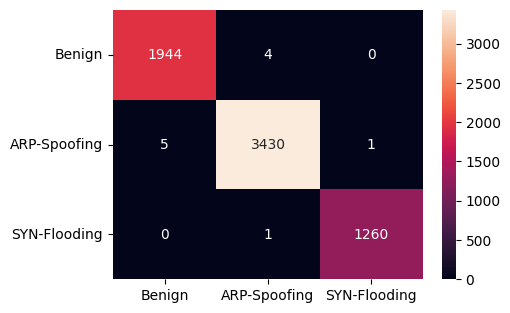

In [24]:
#hực hiện huấn luyện và đánh giá mô hình học máy với các tập dữ liệu và đặc trưng cụ thể bằng cách sử dụng thuật toán di truyền để lựa chọn đặc trưng.
for file in file_list:
    print(file)
    # features=feature_list[file]
    train=file_list[file][0]
    test=file_list[file][1]
    #feature,_=GA(train,test,features,gen_number=25,outputcsv=f"{file}_ET_chosed_GA_output.csv")
    feature= [
    "DNS_arcount",
    "DNS_nscount",
    "DNS_qdcount",
    "DNS_qr",
    "DNS_ra",
    "IP_DF",
    "IP_MF",
    "IP_flags",
    "IP_proto",
    "IP_tos",
    "IP_ttl",
    "Protocol",
    "TCP_ACK",
    "TCP_ACK_R",
    "TCP_ACK_SR",
    "TCP_ACK_sum",
    "TCP_CWR",
    "TCP_CWR_SR",
    "TCP_CWR_ratio",
    "TCP_ECE",
    "TCP_ECE_SR",
    "TCP_PSH_SR",
    "TCP_PSH_ratio",
    "TCP_RST_SR",
    "TCP_RST_ratio",
    "TCP_RST_sum",
    "TCP_SYN",
    "TCP_SYN_R",
    "TCP_SYN_ratio",
    "TCP_SYN_sum",
    "TCP_URG_SR",
    "TCP_window_mean_2",
    "TCP_window_mean_9",
    "TCP_window_mean_WE",
    "TCP_window_std_6",
    "TCP_window_std_WE",
    "TCP_window_sum_of_EW",
    "UDP_len",
    "dst_IP_diversity",
    "dst_port_diversity",
    "entropy",
    "entropy_diff",
    "entropy_mean_2",
    "entropy_mean_6",
    "entropy_mean_WE",
    "entropy_std_6",
    "entropy_std_9",
    "entropy_std_WE",
    "entropy_sum_of_EW",
    "Ether_type",
    "ICMP_type",
    "payload_bytes",
    "payload_bytes_mean_6",
    "payload_bytes_mean_9",
    "payload_bytes_mean_WE",
    "payload_bytes_std_6",
    "pck_size_diff",
    "pck_size_mean_2",
    "pck_size_mean_6",
    "pck_size_mean_9",
    "pck_size_mean_WE",
    "pck_size_std_9",
    "pck_size_std_WE",
    "pck_size_sum_of_EW",
    "sport_class",
    "ts",
    "ts_diff",
    "ts_mean_2",
    "ts_mean_6",
    "ts_mean_9",
    "ts_std_2",
    "ts_std_6",
    "ts_std_9",
    "ts_std_WE",
    "ts_sum_of_EW",
    "Label"
]

    print(feature)
    #GA_output[file]=feature
    output_csv=f"./results/beforeGA/{file}_chosed_output_ML_.csv"
    target_names=['Benign','ARP-Spoofing','SYN-Flooding']
    ML_CV(train,test,output_csv,feature,file,5)   


In [24]:
GA_output={}

In [ ]:
for file in file_list:
    print(file)
    features=feature_list[file]
    train=file_list[file][0]
    test=file_list[file][1]
    feature,_=GA(train,test,features,gen_number=25,outputcsv=f"./results/afterGA/{file}_ET_chosed_GA_output.csv")
    
    print(feature)
    GA_output[file]=feature
    output_csv=f"./results/afterGA/{file}_chosed_output_ML_.csv"
    target_names=[1,0]
    ML_CV(train,test,output_csv,feature,file,5)   


SYN


  0%|          | 0/25 [00:00<?, ?it/s]

In [26]:
with open('GA_output_ET.json', 'w') as fp:
    json.dump(GA_output, fp)

In [27]:
#

In [28]:
import winsound
duration = 1000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)

In [ ]:
#!shutdown /s /t 360

In [ ]:
#!shutdown -a